In [1]:
# !pip install fbprophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [4]:
df['signup_date'] = pd.to_datetime(df.signup_date)
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)

In [5]:
df['diff'] = df['last_trip_date'] - df['signup_date']

In [6]:
df['difference'] = ""
for i in range(len(df['diff'])):
    df['difference'][i] = int(str(df['diff'][i])[:-14])

In [7]:
type(df['difference'][0])

int

In [8]:
df['last month active'] = ''
for i in range(len(df.difference)):
    if df.difference[i] >= 150:
        df['last month active'][i] = 1
    else:
        df['last month active'][i] = 0

In [9]:
df['last month active'].value_counts()

0    37286
1    12714
Name: last month active, dtype: int64

In [10]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver     diff difference  \
0         46.2      3.67                   5.0 143 days        143   
1         50.0      8.26                   5.0  96 days         96   
2        100.0      0.77                   5.0   1 days          1   
3         80.0      2.36                   4.9 170 days        170   
4         82.4      3.13                   4.9  47 days         47   

  last month active  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0

In [11]:
# Are we looking at 6 month active or 1 month active? if we are looking at 
# 6month active then the number of people for 6 month active is just 85 compared to more 49915 for less then 6 months
# makes more sense if it is 1month

In [12]:
df.isnull()

city  trips_in_first_30_days  signup_date  avg_rating_of_driver  \
0      False                   False        False                 False   
1      False                   False        False                 False   
2      False                   False        False                 False   
3      False                   False        False                 False   
4      False                   False        False                 False   
...      ...                     ...          ...                   ...   
49995  False                   False        False                 False   
49996  False                   False        False                  True   
49997  False                   False        False                 False   
49998  False                   False        False                 False   
49999  False                   False        False                  True   

       avg_surge  last_trip_date  phone  surge_pct  ultimate_black_user  \
0          False           False  False      False                False   
1          False           False  False      False                False   
2          False           False  False      False                False   
3          False           False  False      False                False   
4          False           False  False      False                False   
...          ...             ...    ...        ...                  ...   
49995      False           False  False      False                False   
49996      False           False  False      False                False   
49997      False           False  False      False                False   
49998      False           False  False      False                False   
49999      False           False  False      False                False   

       weekday_pct  avg_dist  avg_rating_by_driver   diff  difference  \
0            False     False                 False  False       False   
1            False     False                 False  False       False   
2            False     False                 False  False       False   
3            False     False                 False  False       False   
4            False     False                 False  False       False   
...            ...       ...                   ...    ...         ...   
49995        False     False                 False  False       False   
49996        False     False                 False  False       False   
49997        False     False                 False  False       False   
49998        False     False                 False  False       False   
49999        False     False                 False  False       False   

       last month active  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
49995              False  
49996              False  
49997              False  
49998              False  
49999              False  

[50000 rows x 15 columns]

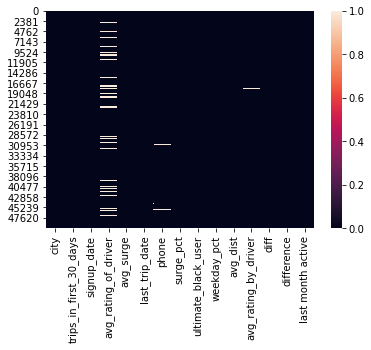

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
diff                         0
difference                   0
last month active            0
dtype: int64

In [15]:
df = df.fillna(df.mean())

In [16]:
df.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
diff                        0
difference                  0
last month active           0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
diff                      0
difference                0
last month active         0
dtype: int64

In [19]:
city = pd.get_dummies(df['city'], drop_first=True)
phone = pd.get_dummies(df['phone'], drop_first=True)

In [20]:
df = pd.concat([df,city,phone],axis=1)

In [21]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver     diff  difference  \
0         46.2      3.67                   5.0 143 days         143   
1         50.0      8.26                   5.0  96 days          96   
2        100.0      0.77                   5.0   1 days           1   
3         80.0      2.36                   4.9 170 days         170   
4         82.4      3.13                   4.9  47 days          47   

   last month active  King's Landing  Winterfell  iPhone  
0                  0               1           0       1  
1                  0               0           0       0  
2                  0               0           0       1  
3                  1               1           0       1  
4                  0               0           1       0

In [22]:
feature_cols = ['avg_rating_of_driver', 'avg_surge','surge_pct','ultimate_black_user',
                'weekday_pct', 'avg_dist', 'avg_rating_by_driver', "King's Landing", 'Winterfell', 'iPhone' ]
X = df[feature_cols] # Features
y = df['last month active'] # Target variable

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
logreg = LogisticRegression()

# fit the model with data
result = logreg.fit(X_train,y_train)

# create prediction
y_pred=logreg.predict(X_test)

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8884,  396],
       [2725,  396]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

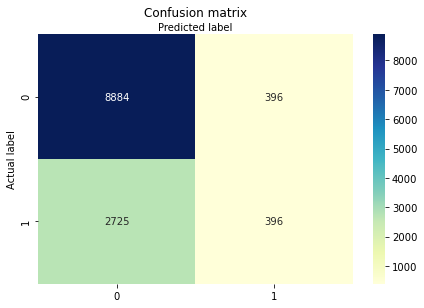

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))   
print("Recall:", metrics.recall_score(y_test, y_pred))  

Accuracy: 0.7483267478429159
Precision: 0.5
Recall: 0.1268824094841397


In [28]:
model = sm.Logit(y_train, X_train.astype(float))
result = model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.513796
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      last month active   No. Observations:                37203
Model:                          Logit   Df Residuals:                    37193
Method:                           MLE   Df Model:                            9
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                 0.09602
Time:                        01:29:38   Log-Likelihood:                -19115.
converged:                       True   LL-Null:                       -21145.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
avg_rating_of_driver    -0.1104      0.019     -5.728      0.000      -0.148      -0.073
avg_surge               -0.5544      0.090     -6.173      0.000      -0.730      -0.378
surge_pct                0.0073      0.001      7.339      0.000       0.005       0.009
ultimate_black_user      0.7830      0.026     30.566      0.000       0.733       0.833
weekday_pct              0.0006      0.000      1.740      0.082   -7.81e-05       0.001
avg_dist                -0.0530      0.003    -19.089      0.000      -0.058      -0.048
avg_rating_by_driver    -0.2872      0.022    -13.294      0.000      -0.330      -0.245
King's Landing           1.2953      0.035     37.116      0.000       1.227       1.364
Winterfell               0.5049      0.031     16.543      0.000       0.445       0.565
iPhone                   0.9594      0.031     30.774      0.000       0.898       1.021
========================================================================================
"""

In [ ]:
# Based on the model gained from 